<a href="https://colab.research.google.com/github/anastasiagorbunovaso/Neural-networks/blob/master/laba1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Загрузка и нормализация CIFAR10

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.optim as optim
# visualisation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
#Определение свёрточной нейронной сети

In [0]:
##Копирование нейросети из раздела Neural Networks и изменение её таким образом, 
##чтобы она получала 3-канальные изображения 
##(вместо 1-канальных изображений, как было определено)

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [0]:
#Определение функции потери и оптимизатор

In [0]:
##Использование Classification Cross-Entropy loss и SGD with momentum.

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
#Тренировка сети

In [0]:
df_results = pd.DataFrame(columns=['epoch', 'train_acc', 'train_loss', 'test_acc', 'test_loss'])

In [7]:
epochs = 50
import time
start_time = time.time()
for epoch in range(epochs):
    print('\n===> epoch %d' % epoch)
    running_loss = 0.0
    df_results.loc[epoch,['epoch']] = epoch+1
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    
    correct = 0
    total = 0
    with torch.no_grad():
        train_loss = 0.0
        for data in trainloader:
            inputs, labels = data
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()       
            loss = criterion(outputs, labels)
            train_loss += loss.item()  
    train_acc = 100 * correct / total
    df_results.loc[epoch,['train_acc']] = train_acc
    df_results.loc[epoch,['train_loss']] = train_loss/len(trainloader)
    
    
    correct = 0
    total = 0
    with torch.no_grad():
        test_loss = 0.0
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()       
            loss = criterion(outputs, labels)
            test_loss += loss.item() 
    test_acc= 100 * correct / total
    df_results.loc[epoch,['test_acc']] = test_acc
    df_results.loc[epoch,['test_loss']] = test_loss/len(testloader)
    print("-— %s seconds —-" % (time.time() - start_time))
    start_time = time.time()


===> epoch 0
[1,  2000] loss: 2.166
[1,  4000] loss: 1.824
[1,  6000] loss: 1.665
[1,  8000] loss: 1.588
[1, 10000] loss: 1.526
[1, 12000] loss: 1.462
-— 117.3568046092987 seconds —-

===> epoch 1
[2,  2000] loss: 1.385
[2,  4000] loss: 1.385
[2,  6000] loss: 1.348
[2,  8000] loss: 1.338
[2, 10000] loss: 1.318
[2, 12000] loss: 1.300
-— 118.1736900806427 seconds —-

===> epoch 2
[3,  2000] loss: 1.232
[3,  4000] loss: 1.216
[3,  6000] loss: 1.207
[3,  8000] loss: 1.200
[3, 10000] loss: 1.171
[3, 12000] loss: 1.170
-— 121.59583950042725 seconds —-

===> epoch 3
[4,  2000] loss: 1.101
[4,  4000] loss: 1.097
[4,  6000] loss: 1.110
[4,  8000] loss: 1.095
[4, 10000] loss: 1.123
[4, 12000] loss: 1.092
-— 116.57847452163696 seconds —-

===> epoch 4
[5,  2000] loss: 1.013
[5,  4000] loss: 1.022
[5,  6000] loss: 1.012
[5,  8000] loss: 1.007
[5, 10000] loss: 1.054
[5, 12000] loss: 1.047
-— 114.8790214061737 seconds —-

===> epoch 5
[6,  2000] loss: 0.930
[6,  4000] loss: 0.961
[6,  6000] loss: 0

In [0]:
#Итоговая таблица

In [8]:
df_results

,epoch,train_acc,train_loss,test_acc,test_loss
0,1,49.516,1.40027,48.05,1.4173
1,2,56.552,1.21149,54.8,1.26682
2,3,61.83,1.06984,58.6,1.15886
3,4,63.492,1.03006,59.15,1.14933
4,5,65.984,0.942146,59.83,1.12199
5,6,69.266,0.870492,62.52,1.07953
6,7,69.208,0.862853,60.95,1.1134
7,8,72.054,0.796775,63.03,1.06232
8,9,72.974,0.767368,62.64,1.09163
9,10,74.91,0.705953,63.7,1.08443


In [0]:
#Построение графиков

In [0]:
##Зависимость функции потерь от номера эпохи для обучающих данных

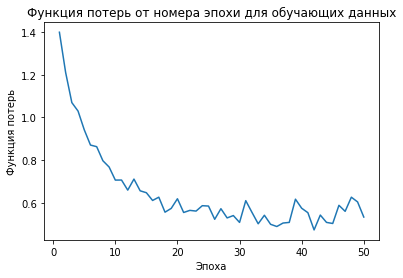

In [9]:
plt.plot(df_results['epoch'],df_results['train_loss']);
plt.title("Функция потерь от номера эпохи для обучающих данных") 
plt.xlabel("Эпоха") 
plt.ylabel("Функция потерь");
plt.savefig('Зависимость функции потерь от номера эпохи для обучающих данных.jpg')

In [0]:
##Зависимость метрики качества от номера эпохи для обучающих данных

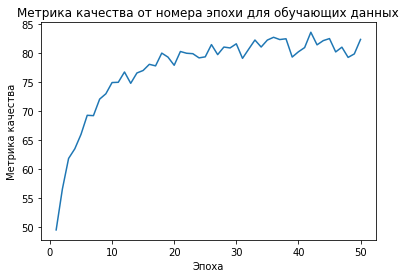

In [10]:
plt.plot(df_results['epoch'],df_results['train_acc']);
plt.title("Метрика качества от номера эпохи для обучающих данных") 
plt.xlabel("Эпоха") 
plt.ylabel("Метрика качества");
plt.savefig('Зависимость метрики качества от номера эпохи для обучающих данных.jpg')

In [0]:
##Зависимость функции потерь от номера эпохи для контрольных данных

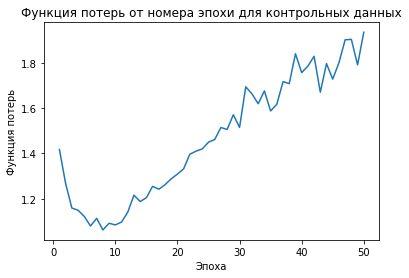

In [11]:
plt.plot(df_results['epoch'],df_results['test_loss']);
plt.title("Функция потерь от номера эпохи для контрольных данных") 
plt.xlabel("Эпоха") 
plt.ylabel("Функция потерь");
plt.savefig('Зависимость функции потерь от номера эпохи для контрольных данных.jpg')

In [0]:
##Зависимость метрики качества от номера эпохи для контрольных данных

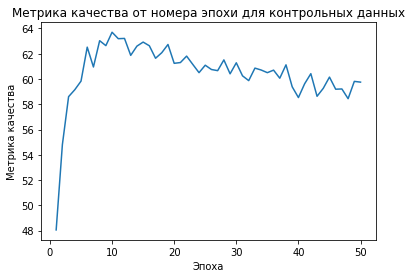

In [12]:
plt.plot(df_results['epoch'],df_results['test_acc']);
plt.title("Метрика качества от номера эпохи для контрольных данных") 
plt.xlabel("Эпоха") 
plt.ylabel("Метрика качества");
plt.savefig('Зависимость метрики качества от номера эпохи для контрольных данных.jpg')

In [0]:
#Сохранение графиков

In [0]:
from google.colab import files
files.download( "Зависимость функции потерь от номера эпохи для обучающих данных.jpg" )  
files.download( "Зависимость метрики качества от номера эпохи для обучающих данных.jpg" )  
files.download( "Зависимость функции потерь от номера эпохи для контрольных данных.jpg" )  
files.download( "Зависимость метрики качества от номера эпохи для контрольных данных.jpg" )  

In [0]:
#Сохранение обученной модели

In [0]:
PATH = 'C:/Users/Admin/Downloads'
torch.save(net.state_dict(), PATH)